## Prediction Heart disease using Machine Learning

In [1]:
#Importing the Libraries 
#Regular EDA (Exploratory data analysis) and ploting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models form scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Eavluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
#Load data
df= pd.read_csv('./data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.shape

(303, 14)

## Data Exploration Analysis or EDA
The goal is to know more about the data and become a subject matter expert on the dataset you are working with.

In [5]:
df.target.value_counts()


target
1    165
0    138
Name: count, dtype: int64

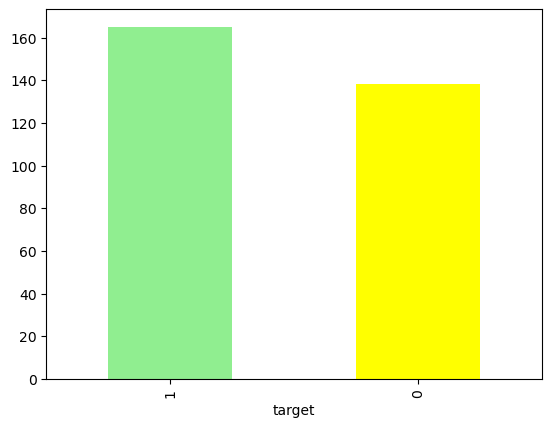

In [6]:
df.target.value_counts().plot(kind='bar', color= ['lightgreen', 'yellow']);

In [7]:
#are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Compare target column with sex column using pd.crosstab()
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


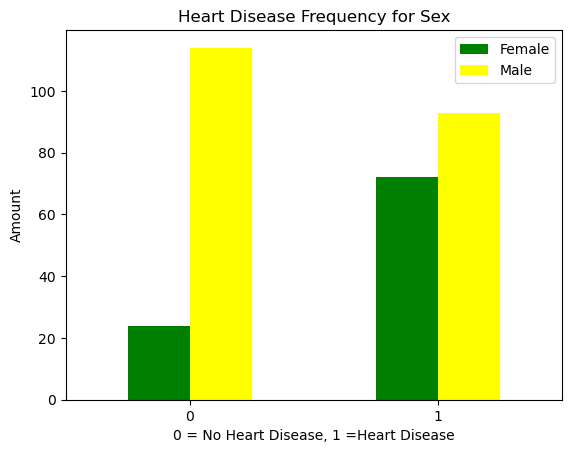

In [9]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=[ 'green', 'yellow']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Heart Disease, 1 =Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()

## Age vs Max Heart Rate Disease

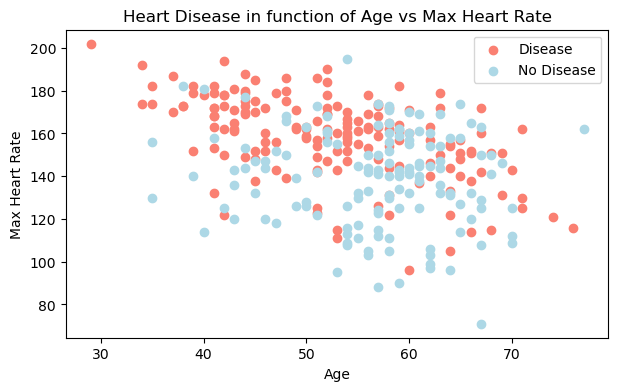

In [10]:
plt.figure(figsize=(7,4))

plt.scatter(df.age[df.target == 1] , df['thalach'][df.target==1] , c='salmon');

#Scatter plot with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue');

plt.title('Heart Disease in function of Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

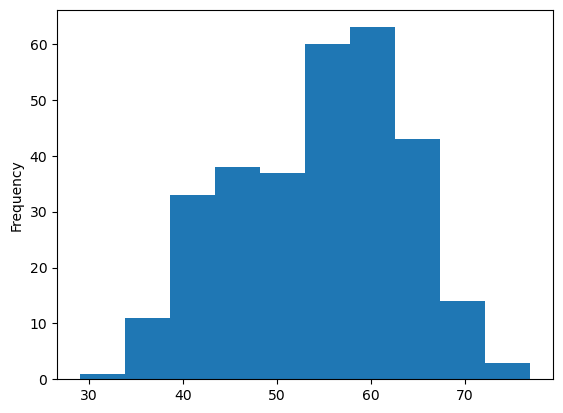

In [11]:
#Check the Distribution of the age
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

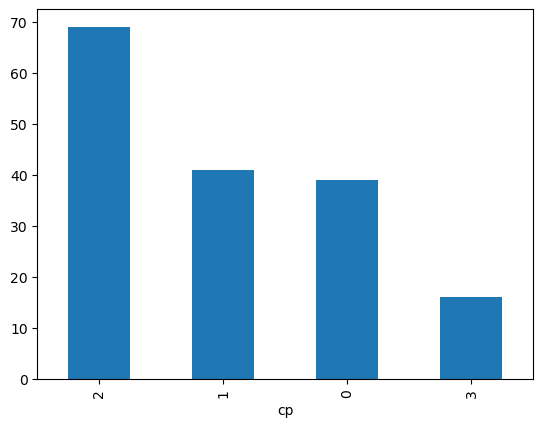

In [12]:
df.cp[df.target==1].value_counts().plot.bar();

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


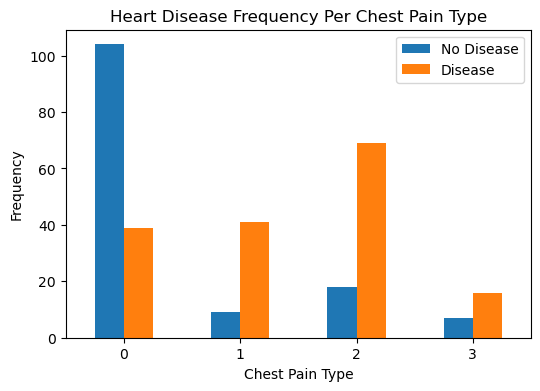

In [14]:
pd.crosstab(df.cp, df.target).plot.bar(figsize=(6,4))
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

In [15]:
#Make a Correlation Matrix
correlation= df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [16]:
for i in correlation.columns:
    for j in correlation.columns:
        if i==j:
            continue
        else:
            # print(f"Correlation bw {i} and {j}: {correlation.loc[i, j]}")
            if(correlation.loc[i, j] >= 0.5 or correlation.loc[i, j]<=-0.5):
                print(f"The Correlation bw {i} and {j} is {correlation.loc[i, j]}.")

The Correlation bw oldpeak and slope is -0.5775368167291409.
The Correlation bw slope and oldpeak is -0.5775368167291409.


## 5. Modelling

In [17]:
#Split Data into Train and test set
np.random.seed(42)
X= df.drop('target', axis=1)
y= df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.2)


In [18]:
#Put Models in a Dictionary
models = {'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

# Create a Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_score= {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name]= model.score(X_test, y_test)
        print(f"The Score of {name} is {model_score[name]*100:.2f}")
    return model_score

In [19]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

The Score of Logistic Regression is 78.69
The Score of KNN is 59.02


C:\Users\HP\anaconda3\envs\project_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Score of Random Forest is 80.33


## Model Comparison

In [20]:
model_scores

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

In [21]:
model_score_df= pd.DataFrame(model_scores, index=['accuracy'])

In [22]:
model_score_df

,Logistic Regression,KNN,Random Forest
accuracy,0.786885,0.590164,0.803279


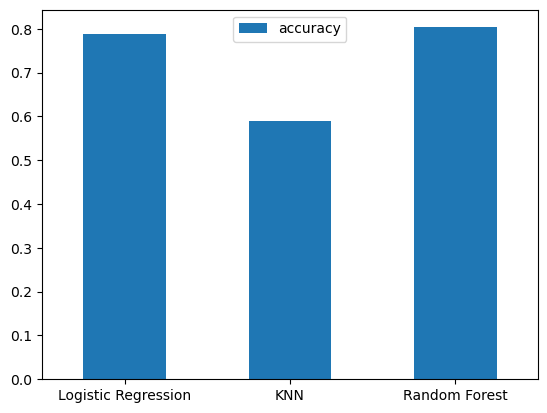

In [23]:
model_score_df.T.plot.bar();
plt.xticks(rotation=0);

* Hyper Parameter Tuning
* Feature Importance
* Confusion Matrix
* Cross- Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

## Hyper Parameter Tuning

In [24]:
# K Nearest Neighbors Classifier
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [25]:
test_scores

[0.5409836065573771,
 0.5409836065573771,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836]

In [26]:
train_scores

[1.0,
 0.8057851239669421,
 0.7851239669421488,
 0.7727272727272727,
 0.7520661157024794,
 0.7520661157024794,
 0.7479338842975206,
 0.7355371900826446,
 0.743801652892562,
 0.743801652892562,
 0.7355371900826446,
 0.7355371900826446,
 0.7148760330578512,
 0.7107438016528925,
 0.71900826446281,
 0.7107438016528925,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165]

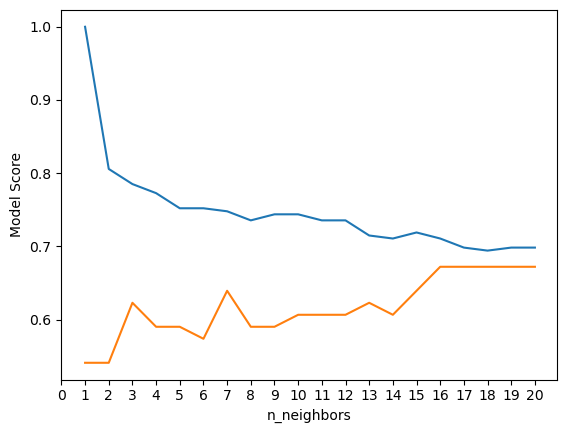

In [27]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('n_neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(0,21,step=1),rotation=0)
plt.show()

In [28]:
print(f'Maximum KNN Score on Test Data is {max(test_scores)*100:.2f}%')
print(f'Maximum KNN Score on Train Data is {max(train_scores)*100:.2f}%')

Maximum KNN Score on Test Data is 67.21%
Maximum KNN Score on Train Data is 100.00%


## Hyperparameter Tuning using `RandomizedSearchCV()`

In [29]:
log_reg_grid= {"C": np.logspace(-4,4,20 ), "solver" : ["liblinear"]}

rf_grid= {"n_estimators" : np.arange(10,1000,50),
          'max_depth' : [None, 3, 5, 10], 
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(2,20,2)}

In [30]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=10,
                                verbose = 1)

rs_log_reg.fit(X_train, y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.7868852459016393

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test, y_test)

0.7868852459016393

In [34]:
# Hyperparameter tuning of RandomForestClassifier()

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions = rf_grid,
                          n_iter = 20,
                          cv=5,
                           verbose=1)


rs_rf.fit(X_train, y_train)
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.819672131147541

In [35]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_depth': 5}

## Hyperparameter tuning with `GridSearchCV()`

In [37]:
log_reg_grid = {'C': np.logspace(-4,4,30),
 'solver': ['liblinear']}

In [38]:
log_reg_grid

{'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
        1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
        1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
        2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
        2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
        3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
        4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
        5.29831691e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [42]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose =True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test, y_test)

0.7868852459016393

In [45]:
model_scores

{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

In [56]:
rf_grid ={'n_estimators': np.arange(200,500,100),
 'max_depth': [None, 3],
 'min_samples_split': [ 4,  6 ],
 'min_samples_leaf': [ 4,  6,  8]}


In [57]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     verbose = True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3], 'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [4, 6],
                         'n_estimators': array([200, 300, 400])},
             verbose=True)

In [58]:
gs_rf.score(X_test, y_test)

0.819672131147541

In [59]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 200}

# Evaluating Tuned Machine Learning Classifiers
* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Recall
* Precision
* F1 Score

In [60]:
y_preds = gs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

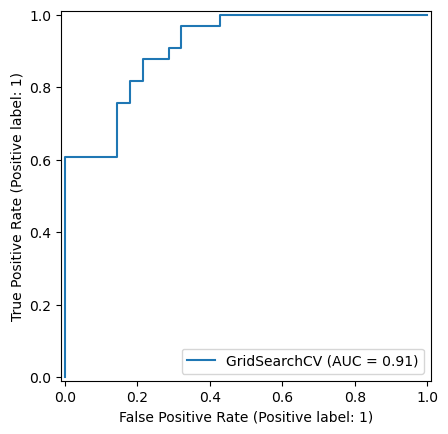

In [64]:
#PLot ROC Curve and Calculate AUC
RocCurveDisplay.from_estimator(gs_rf, X_test, y_test);

In [65]:
confusion_matrix(y_test, y_preds)

array([[18, 10],
       [ 1, 32]], dtype=int64)

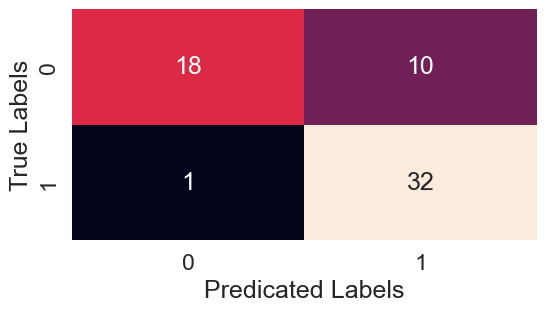

In [71]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a Confusion Matrix using Seaborn's heatmap()
    """
    fig, ax= plt.subplots(figsize=(6,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar= False)
    plt.xlabel("Predicated Labels")
    plt.ylabel("True Labels")
    plt.show()

plot_conf_matrix(y_test, y_preds)


In [73]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



In [74]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 200}

In [75]:
#Creating a New Classifier with Best Parameters
clf_best = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_leaf = 8, min_samples_split=4)

In [78]:
#Cross-validated Accuracy
cv_acc= cross_val_score(clf_best, X, y, cv=5, scoring='accuracy')
cv_acc, np.mean(cv_acc)

(array([0.83606557, 0.8852459 , 0.80327869, 0.88333333, 0.76666667]),
 0.8349180327868853)

In [79]:
#Cross Validated Precision
cv_precision = cross_val_score(clf_best, X, y, cv=5, scoring='precision')
cv_precision, np.mean(cv_precision)

(array([0.80555556, 0.87878788, 0.82352941, 0.83783784, 0.74358974]),
 0.8178600855071443)

In [80]:
# Corss Validated Recall
cv_recall = cross_val_score(clf_best, X, y, cv=5, scoring='recall')
cv_recall, np.mean(cv_recall)

(array([0.87878788, 0.90909091, 0.81818182, 0.93939394, 0.90909091]),
 0.8909090909090909)

In [81]:
# Cross Validated F1 Score

cv_f1 = cross_val_score(clf_best, X, y, cv=5, scoring='f1')
cv_f1, np.mean(cv_f1)

(array([0.87323944, 0.89230769, 0.83076923, 0.89855072, 0.80555556]),
 0.8600845279779756)

In [84]:
# Visualize Cross Validated Metrics
cv_acc_mean = np.mean(cv_acc)
cv_precision_mean = np.mean(cv_precision)
cv_recall_mean = np.mean(cv_recall)
cv_f1_mean = np.mean(cv_f1)

cv_metrics = pd.DataFrame({
    "accuracy" : cv_acc_mean,
    "precision" : cv_precision_mean,
    "recall" : cv_recall_mean,
    "F1 Score" : cv_f1_mean
}, index=[0])

cv_metrics

,accuracy,precision,recall,F1 Score
0,0.834918,0.81786,0.890909,0.860085


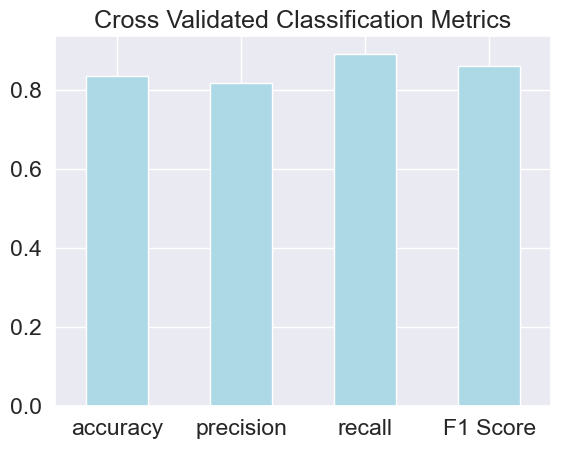

In [92]:
cv_metrics.T.plot.bar(color=['lightblue'], title = 'Cross Validated Classification Metrics', legend=False);
plt.xticks(rotation=0)
plt.show()

## Feature Importance

 Which Features contributed most to the outcomes of the model and how did they contribute?
 Finding Feature Importance is different for each Machine Learning Model.

In [95]:
clf_best.fit(X_train, y_train)
importances = clf_best.feature_importances_
importances

array([0.03693271, 0.01930087, 0.22146488, 0.01259059, 0.03090464,
       0.00112581, 0.00753075, 0.11117257, 0.08227741, 0.14228408,
       0.06986901, 0.09580931, 0.16873737])

In [99]:
X_columns = X.columns
X_columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

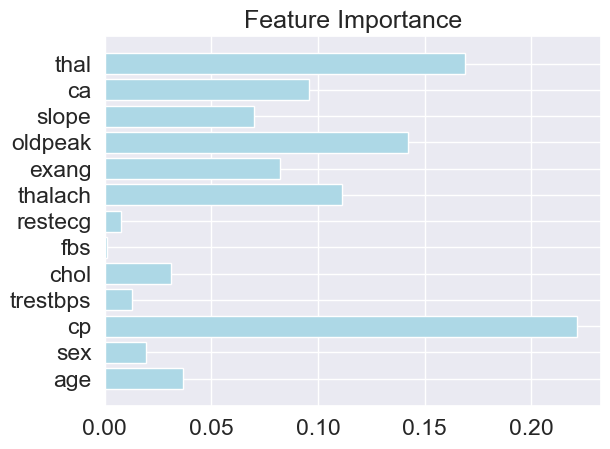

In [101]:
plt.barh(X_columns, importances, color=['lightblue'])
plt.title("Feature Importance")
plt.xticks(rotation=0)
plt.show()